In [1]:
import numpy as np

import onlinecp.algos as algos
import onlinecp.utils.evaluation as ev
import onlinecp.utils.feature_functions as feat
import onlinecp.utils.gendata as gd

In [26]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import sklearn 

In [28]:
!  python test_algo_on_data.py 'newmaRFF' 'tyler'  -n 200 -nb 50 -d 1 -show 

Start algo  newmaRFF ...
# RF:  3457
Evaluate performance 0 / 30
Evaluate performance 1 / 30
Evaluate performance 2 / 30
Evaluate performance 3 / 30
Evaluate performance 4 / 30
Evaluate performance 5 / 30
Evaluate performance 6 / 30
Evaluate performance 7 / 30
Evaluate performance 8 / 30
Evaluate performance 9 / 30
Evaluate performance 10 / 30
Evaluate performance 11 / 30
Evaluate performance 12 / 30
Evaluate performance 13 / 30
Evaluate performance 14 / 30
Evaluate performance 15 / 30
Evaluate performance 16 / 30
Evaluate performance 17 / 30
Evaluate performance 18 / 30
Evaluate performance 19 / 30
Evaluate performance 20 / 30
Evaluate performance 21 / 30
Evaluate performance 22 / 30
Evaluate performance 23 / 30
Evaluate performance 24 / 30
Evaluate performance 25 / 30
Evaluate performance 26 / 30
Evaluate performance 27 / 30
Evaluate performance 28 / 30
Evaluate performance 29 / 30
Evaluate performance 0 / 1
printing some plots
Figure(640x480)
Figure(640x480)


In [113]:
t = np.load('tyler.npz')

In [114]:
t.__dict__

{'_files': ['detection_stat.npy',
  'online_th.npy',
  'ground_truth.npy',
  'EDD.npy',
  'FA.npy',
  'ND.npy',
  'EDDth.npy',
  'FAth.npy',
  'NDth.npy'],
 'files': ['detection_stat',
  'online_th',
  'ground_truth',
  'EDD',
  'FA',
  'ND',
  'EDDth',
  'FAth',
  'NDth'],
 'allow_pickle': False,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='tyler.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x152bd7198>,
 'fid': <_io.BufferedReader name='tyler.npz'>}

In [112]:
import onlinecp.utils.evaluation as ev


In [ ]:
ev.compute_curves()

In [252]:
t['ground_truth']

array([1., 0., 0., ..., 0., 0., 0.])

In [115]:
t['online_th']

array([0.02436939, 0.02436155, 0.0243536 , ..., 0.02613017, 0.02612259,
       0.02611518])

In [116]:
t['detection_stat']

array([0.0178277 , 0.01738803, 0.01718318, ..., 0.01610819, 0.01559255,
       0.01541181])

In [118]:
t['EDDth']

array([146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667, 146.04166667, 146.04166667,
       146.04166667, 146.04166667])

In [244]:
Y, cps = pw_normal(1000, 2)

In [275]:
Y.shape

(1000, 2)

In [256]:
cps[-1]

1000

In [255]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [257]:
zeros = np.zeros(cps[-1])

In [273]:
my_gt = np.array([1 if i in cps else 0 for i in range(cps[-1]) ])

In [267]:
np.where(np.array(my_gt)==1)

(array([342, 678]),)

In [253]:
cps

[342, 678, 1000]

In [249]:
ground_truth

array([], dtype=int64)

In [199]:
from sklearn.datasets import make_blobs

In [221]:
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

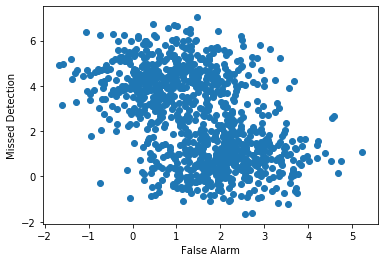

In [215]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
# plt.plot(FAth, NDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Missed Detection')
plt.show()

In [234]:
np.array(cps)

array([ 335,  653, 1000])

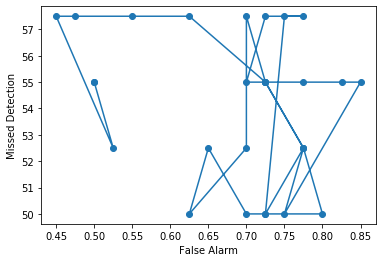

In [35]:
plt.figure()
plt.plot(t['FA'], t['ND'], '-o')
# plt.plot(FAth, NDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Missed Detection')
plt.show()

In [ ]:
parser.add_argument('-n', type=int, default=2000, help='number of samples for each distribution')
parser.add_argument('-nb', type=int, default=500, help='number of changes of distribution in the series')
parser.add_argument('-d', type=int, default=100, help='dimensionality of the samples in the time series')

In [75]:
# default data settings
n=200 # distance between cps, the first CP is at n, then 2n, 3n etc, last one is at n*(nb) - n
nb_change=2
d=2

In [226]:
# parameters of gmm
k = 3
std_mean = 10  # the bigger, the more change in means
wishart = 5  # the bigger, the less change in diagonal variances

X, ground_truth = gd.stream_GMM(d=d, n=n, nb_change=nb_change, std_mean=std_mean, 
                                concentration_wishart=wishart, k=k)

In [232]:
ground_truth.shape

(400,)

In [94]:
import pandas as pd

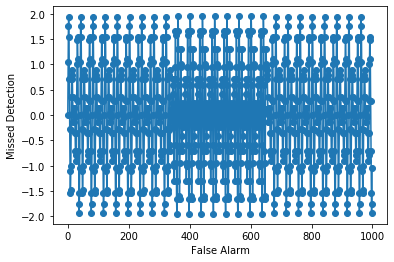

In [196]:
plt.figure()
plt.plot([i for i in range(Y.shape[0])], pd.DataFrame(Y)[0].values, '-o')
# plt.plot(FAth, NDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Missed Detection')
plt.show()

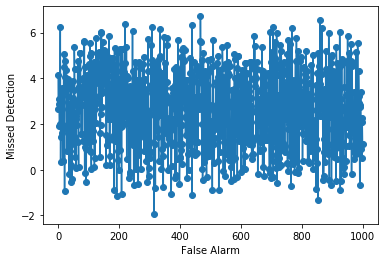

In [205]:
plt.figure()
plt.plot([i for i in range(X.shape[0])], pd.DataFrame(X)[1].values, '-o')
# plt.plot(FAth, NDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Missed Detection')
plt.show()

In [ ]:
# each row is a data point, each col is a feature/dimension
X.shape

In [ ]:
gd.stream_GMM?

In [ ]:
X2, truth = gd.stream_GMM(d=1, nb_change=2, n=1000)

In [272]:

# Data generation
n = 1000
nb_change = 20
d = 5
mult = 1.

# parameters of gmm
k = 10
std_mean = 0.11  # the bigger, the more change in means
wishart = 5  # the bigger, the less change in diagonal variances

# X, ground_truth = gd.stream_GMM(d=d, n=n, nb_change=nb_change, std_mean=std_mean, concentration_wishart=wishart,
#                                 k=k)
X=Y
ground_truth=np.array(my_gt)

# common config
choice_sigma = 'median'
numel = 100
data_sigma_estimate = X[:numel]  # data for median trick to estimate sigma
B = 250 # window size

# Scan-B config
N = 3  # number of windows in scan-B

# Newma and MA config
big_Lambda, small_lambda = algos.select_optimal_parameters(B)  # forget factors chosen with heuristic in the paper
thres_ff = small_lambda
# number of random features is set automatically with this criterion
m = int((1 / 4) / (small_lambda + big_Lambda) ** 2)
m_OPU = 10 * m
W, sigmasq = feat.generate_frequencies(m, d, data=data_sigma_estimate, choice_sigma=choice_sigma)

# detector = algos.ScanB(X[0], kernel_func=lambda x, y: feat.gauss_kernel(x, y, np.sqrt(sigmasq)), window_size=B,
#                        nbr_windows=N, adapt_forget_factor=thres_ff)
# detector.apply_to_data(X)


detector = algos.NEWMA(X[0], forget_factor=big_Lambda, forget_factor2=small_lambda,
                       adapt_forget_factor=thres_ff)
detector.apply_to_data(X)


# compute performance metrics
detection_stat = np.array([i[0] for i in detector.stat_stored])[int(10 * n):]  # padding
online_th = np.array([i[1] for i in detector.stat_stored])[int(10 * n):]
ground_truth = ground_truth[int(10 * n):]

# display perf
EDD, FA, ND = ev.compute_curves(ground_truth, detection_stat, num_points=30, start_coeff=1.05, end_coeff=1.2)
EDDth, FAth, NDth = ev.compute_curves(ground_truth, detection_stat, num_points=1,
                                      thres_values=online_th, start_coeff=1, end_coeff=1)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

//anaconda3/envs/newma/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/envs/newma/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: division by zero

In [243]:
Y.shape

(1000,)

In [237]:
ground_truth

array([1., 0., 0., ..., 0., 0., 0.])